In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [2]:
def read_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type='variation.txt', window_size=100):
    res = {}
    res[algo] = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir, type)    
                with open(full_path, 'r') as f:
                    for line in f:
                        num_str = re.match(r'\(srcIP = +(\d+\.\d+\.\d+\.\d+)\) +(.+)', line).group(2)
                        num_list = [int(num) for num in num_str.split()]
                        # print(num_list)
                        res[algo].append(num_list)
            
    return res

# read_data()

In [6]:
def calculate_window_value(data, weight):
    res = []
    for flow in data:
        f = [flow[0]]
        for i in range(1, len(flow)):
            window_sum = round(weight*f[i-1] + (1-weight)*flow[i])
            f.append(window_sum)
        res.append(f)
        
    return res    

[[0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 32913, 36017, 38744, 41530, 44370, 47340, 50489, 53131, 58150, 62161], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 14845, 16320, 17793, 20732, 22242, 22894, 24906, 25654, 26945, 28155], [0, 7, 16, 25, 31, 34, 39, 50, 62, 77, 101, 241, 571, 2823, 7363, 9477, 13721, 17748, 19761, 23036, 25515], [0, 692, 1386, 1689, 3525, 5281, 6784, 7963, 8447, 9796, 9800, 12721, 12737, 12750, 13302, 15302, 15712, 17202, 18348, 20229, 20267], [0, 1233, 2293, 2645, 2917, 4131, 5069, 6606, 7360, 8243, 9722, 10692, 11818, 12912, 14073, 15177, 16135, 16815, 17865, 18985, 19910], [0, 982, 1948, 2903, 3853, 5020, 6181, 7161, 8131, 9094, 10056, 10993, 11846, 12742, 13559, 14396, 15312, 16207, 17148, 18139, 19033], [0, 983, 1877, 2940, 3867, 4839, 6043, 6872, 7645, 8519, 9370, 10448, 11403, 12393, 13504, 14280, 15229, 16222, 17337, 17980, 18927], [0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7039, 7538

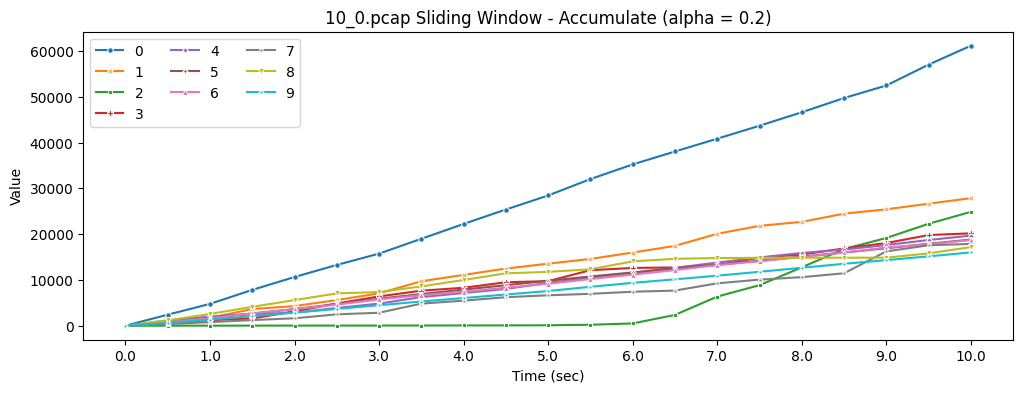

[[0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 32913, 36017, 38744, 41530, 44370, 47340, 50489, 53131, 58150, 62161], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 14845, 16320, 17793, 20732, 22242, 22894, 24906, 25654, 26945, 28155], [0, 7, 16, 25, 31, 34, 39, 50, 62, 77, 101, 241, 571, 2823, 7363, 9477, 13721, 17748, 19761, 23036, 25515], [0, 692, 1386, 1689, 3525, 5281, 6784, 7963, 8447, 9796, 9800, 12721, 12737, 12750, 13302, 15302, 15712, 17202, 18348, 20229, 20267], [0, 1233, 2293, 2645, 2917, 4131, 5069, 6606, 7360, 8243, 9722, 10692, 11818, 12912, 14073, 15177, 16135, 16815, 17865, 18985, 19910], [0, 982, 1948, 2903, 3853, 5020, 6181, 7161, 8131, 9094, 10056, 10993, 11846, 12742, 13559, 14396, 15312, 16207, 17148, 18139, 19033], [0, 983, 1877, 2940, 3867, 4839, 6043, 6872, 7645, 8519, 9370, 10448, 11403, 12393, 13504, 14280, 15229, 16222, 17337, 17980, 18927], [0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7039, 7538

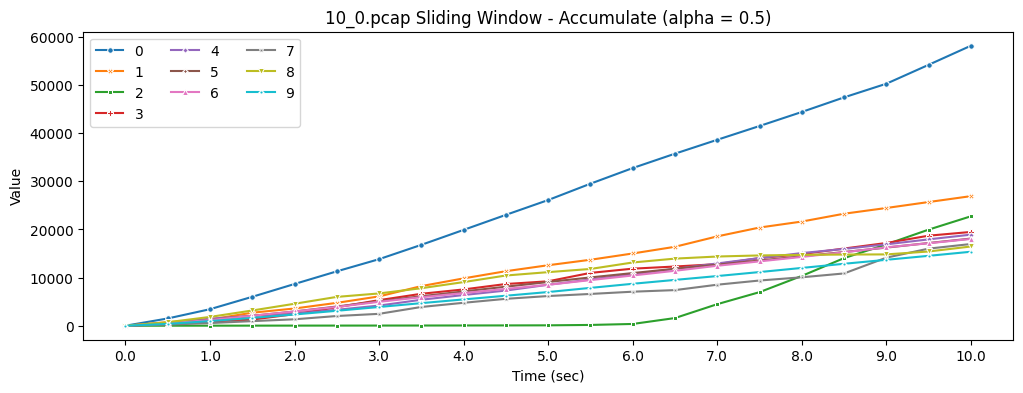

[[0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 32913, 36017, 38744, 41530, 44370, 47340, 50489, 53131, 58150, 62161], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 14845, 16320, 17793, 20732, 22242, 22894, 24906, 25654, 26945, 28155], [0, 7, 16, 25, 31, 34, 39, 50, 62, 77, 101, 241, 571, 2823, 7363, 9477, 13721, 17748, 19761, 23036, 25515], [0, 692, 1386, 1689, 3525, 5281, 6784, 7963, 8447, 9796, 9800, 12721, 12737, 12750, 13302, 15302, 15712, 17202, 18348, 20229, 20267], [0, 1233, 2293, 2645, 2917, 4131, 5069, 6606, 7360, 8243, 9722, 10692, 11818, 12912, 14073, 15177, 16135, 16815, 17865, 18985, 19910], [0, 982, 1948, 2903, 3853, 5020, 6181, 7161, 8131, 9094, 10056, 10993, 11846, 12742, 13559, 14396, 15312, 16207, 17148, 18139, 19033], [0, 983, 1877, 2940, 3867, 4839, 6043, 6872, 7645, 8519, 9370, 10448, 11403, 12393, 13504, 14280, 15229, 16222, 17337, 17980, 18927], [0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7039, 7538

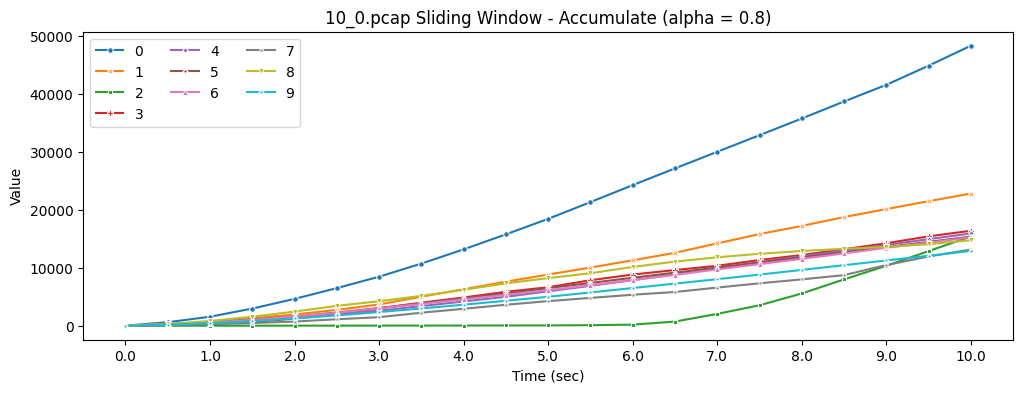

[[0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7833, 18875, 21313, 23497, 27799, 28526, 32659, 33419, 34546, 35133], [0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 29217, 29235, 29253, 29265, 29275, 29282, 29285, 29287, 29289, 29291], [0, 667, 863, 1219, 1294, 1631, 1873, 2098, 2454, 2662, 2996, 4709, 6203, 7550, 9544, 11048, 12560, 14354, 15791, 17200, 19017], [0, 205, 563, 1058, 1381, 1730, 2301, 2870, 3936, 4532, 4922, 5753, 6820, 7454, 8033, 9008, 10612, 12050, 14331, 15479, 16858], [0, 35, 68, 103, 126, 147, 175, 199, 223, 246, 275, 686, 1517, 5307, 7762, 8384, 11822, 13321, 13745, 14703, 14705], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 13812, 13814, 13816, 13820, 13821, 13824, 13826, 13828, 13828, 13828], [0, 560, 793, 1146, 1631, 1997, 2335, 2377, 2493, 2545, 2571, 3725, 4928, 6240, 7694, 9046, 10181, 11445, 12459, 13433, 13698], [0, 235, 500, 751, 998, 1254, 1478, 1709, 1959, 2193, 2428, 3593, 4785, 5958, 7132, 

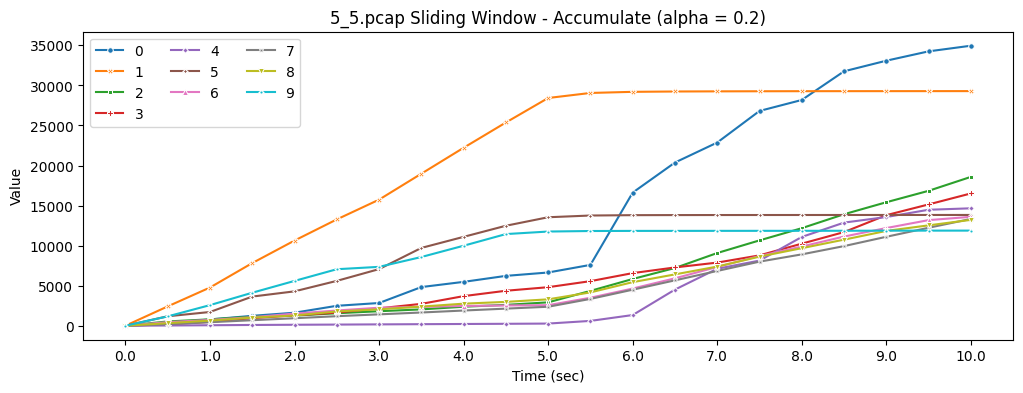

[[0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7833, 18875, 21313, 23497, 27799, 28526, 32659, 33419, 34546, 35133], [0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 29217, 29235, 29253, 29265, 29275, 29282, 29285, 29287, 29289, 29291], [0, 667, 863, 1219, 1294, 1631, 1873, 2098, 2454, 2662, 2996, 4709, 6203, 7550, 9544, 11048, 12560, 14354, 15791, 17200, 19017], [0, 205, 563, 1058, 1381, 1730, 2301, 2870, 3936, 4532, 4922, 5753, 6820, 7454, 8033, 9008, 10612, 12050, 14331, 15479, 16858], [0, 35, 68, 103, 126, 147, 175, 199, 223, 246, 275, 686, 1517, 5307, 7762, 8384, 11822, 13321, 13745, 14703, 14705], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 13812, 13814, 13816, 13820, 13821, 13824, 13826, 13828, 13828, 13828], [0, 560, 793, 1146, 1631, 1997, 2335, 2377, 2493, 2545, 2571, 3725, 4928, 6240, 7694, 9046, 10181, 11445, 12459, 13433, 13698], [0, 235, 500, 751, 998, 1254, 1478, 1709, 1959, 2193, 2428, 3593, 4785, 5958, 7132, 

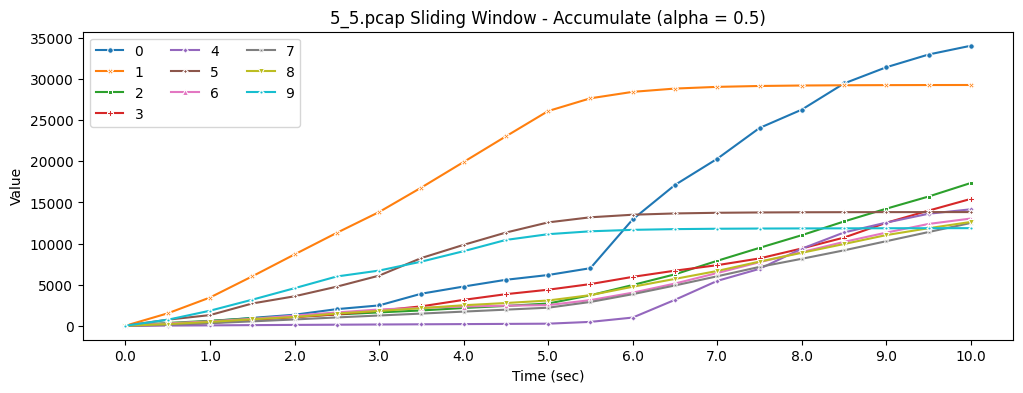

[[0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6410, 6750, 7833, 18875, 21313, 23497, 27799, 28526, 32659, 33419, 34546, 35133], [0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 26161, 29196, 29217, 29235, 29253, 29265, 29275, 29282, 29285, 29287, 29289, 29291], [0, 667, 863, 1219, 1294, 1631, 1873, 2098, 2454, 2662, 2996, 4709, 6203, 7550, 9544, 11048, 12560, 14354, 15791, 17200, 19017], [0, 205, 563, 1058, 1381, 1730, 2301, 2870, 3936, 4532, 4922, 5753, 6820, 7454, 8033, 9008, 10612, 12050, 14331, 15479, 16858], [0, 35, 68, 103, 126, 147, 175, 199, 223, 246, 275, 686, 1517, 5307, 7762, 8384, 11822, 13321, 13745, 14703, 14705], [0, 1473, 1848, 4119, 4454, 5923, 7436, 10373, 11441, 12828, 13809, 13812, 13814, 13816, 13820, 13821, 13824, 13826, 13828, 13828, 13828], [0, 560, 793, 1146, 1631, 1997, 2335, 2377, 2493, 2545, 2571, 3725, 4928, 6240, 7694, 9046, 10181, 11445, 12459, 13433, 13698], [0, 235, 500, 751, 998, 1254, 1478, 1709, 1959, 2193, 2428, 3593, 4785, 5958, 7132, 

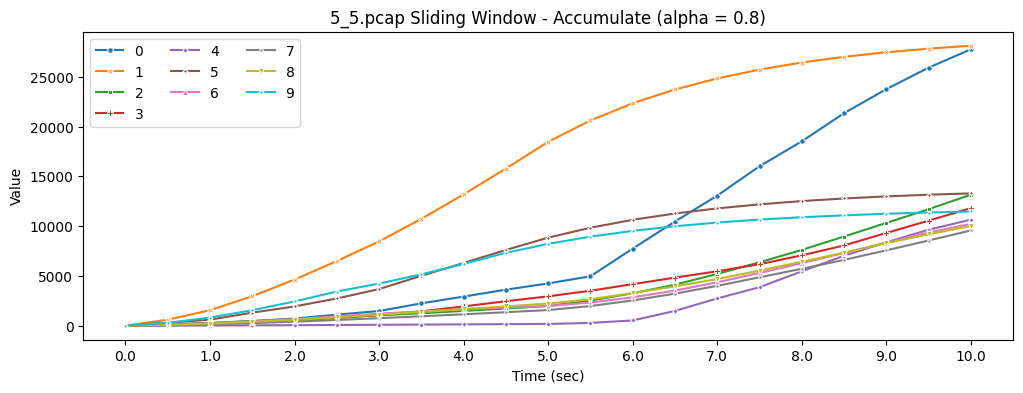

[[0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6720, 17762, 20200, 22380, 26677, 27398, 31532, 32294, 33421, 34006, 35253, 37057], [0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 23046, 23064, 23082, 23094, 23104, 23111, 23114, 23116, 23118, 23120, 23126, 23131], [0, 667, 863, 1219, 1294, 1631, 1873, 2098, 2454, 4167, 5661, 7008, 9002, 10506, 12018, 13812, 15249, 16658, 18475, 19739, 21464], [0, 205, 563, 1058, 1381, 1730, 2301, 2870, 3936, 4767, 5834, 6468, 7047, 8022, 9626, 11064, 13345, 14493, 15872, 17624, 19529], [0, 35, 68, 103, 126, 147, 175, 199, 223, 634, 1465, 5255, 7710, 8332, 11770, 13269, 13693, 14651, 14653, 14657, 17415], [0, 235, 500, 751, 998, 1254, 1478, 1709, 1959, 3124, 4316, 5489, 6663, 7806, 8637, 9686, 10862, 11980, 13074, 14177, 15331], [0, 400, 720, 1106, 1345, 1904, 2118, 2471, 2846, 3849, 5197, 6082, 7061, 8369, 9377, 10444, 11542, 12135, 12819, 14002, 14955], [0, 560, 793, 1146, 1631, 1997, 2335, 2377, 2493, 3647, 4850, 6162, 7616, 8968, 10103, 

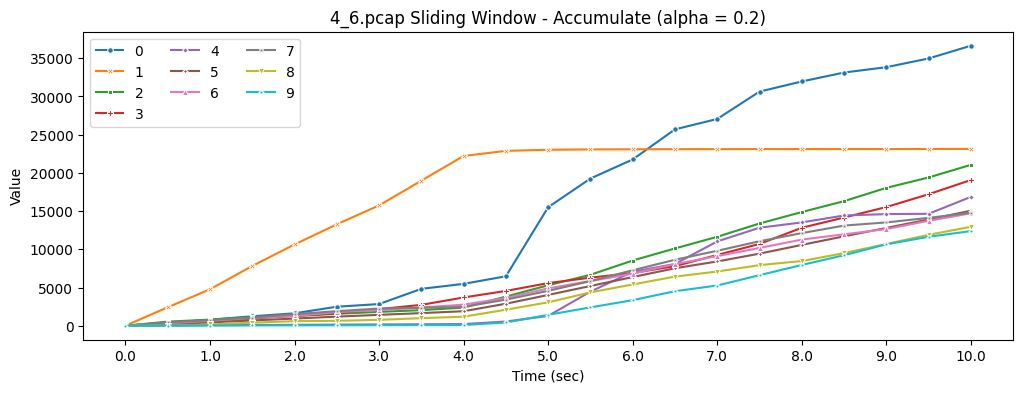

[[0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6720, 17762, 20200, 22380, 26677, 27398, 31532, 32294, 33421, 34006, 35253, 37057], [0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 23046, 23064, 23082, 23094, 23104, 23111, 23114, 23116, 23118, 23120, 23126, 23131], [0, 667, 863, 1219, 1294, 1631, 1873, 2098, 2454, 4167, 5661, 7008, 9002, 10506, 12018, 13812, 15249, 16658, 18475, 19739, 21464], [0, 205, 563, 1058, 1381, 1730, 2301, 2870, 3936, 4767, 5834, 6468, 7047, 8022, 9626, 11064, 13345, 14493, 15872, 17624, 19529], [0, 35, 68, 103, 126, 147, 175, 199, 223, 634, 1465, 5255, 7710, 8332, 11770, 13269, 13693, 14651, 14653, 14657, 17415], [0, 235, 500, 751, 998, 1254, 1478, 1709, 1959, 3124, 4316, 5489, 6663, 7806, 8637, 9686, 10862, 11980, 13074, 14177, 15331], [0, 400, 720, 1106, 1345, 1904, 2118, 2471, 2846, 3849, 5197, 6082, 7061, 8369, 9377, 10444, 11542, 12135, 12819, 14002, 14955], [0, 560, 793, 1146, 1631, 1997, 2335, 2377, 2493, 3647, 4850, 6162, 7616, 8968, 10103, 

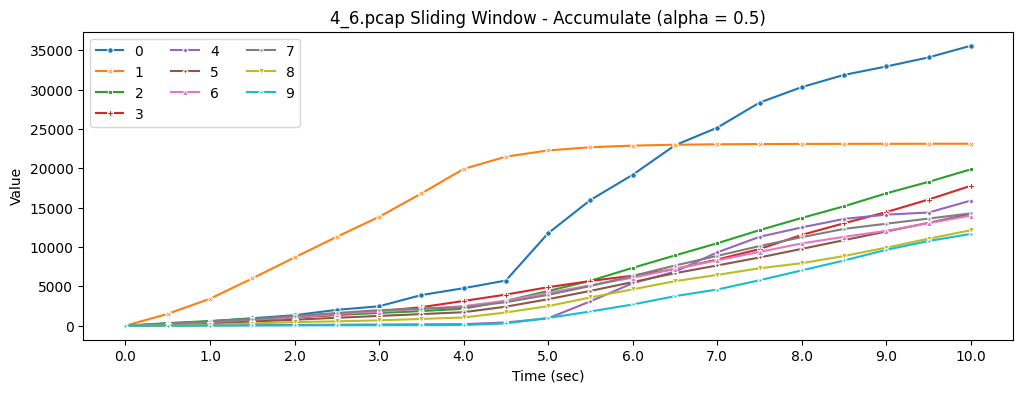

[[0, 445, 887, 1350, 1721, 2701, 2923, 5323, 5637, 6720, 17762, 20200, 22380, 26677, 27398, 31532, 32294, 33421, 34006, 35253, 37057], [0, 3014, 5358, 8584, 11336, 13930, 16359, 19788, 23025, 23046, 23064, 23082, 23094, 23104, 23111, 23114, 23116, 23118, 23120, 23126, 23131], [0, 667, 863, 1219, 1294, 1631, 1873, 2098, 2454, 4167, 5661, 7008, 9002, 10506, 12018, 13812, 15249, 16658, 18475, 19739, 21464], [0, 205, 563, 1058, 1381, 1730, 2301, 2870, 3936, 4767, 5834, 6468, 7047, 8022, 9626, 11064, 13345, 14493, 15872, 17624, 19529], [0, 35, 68, 103, 126, 147, 175, 199, 223, 634, 1465, 5255, 7710, 8332, 11770, 13269, 13693, 14651, 14653, 14657, 17415], [0, 235, 500, 751, 998, 1254, 1478, 1709, 1959, 3124, 4316, 5489, 6663, 7806, 8637, 9686, 10862, 11980, 13074, 14177, 15331], [0, 400, 720, 1106, 1345, 1904, 2118, 2471, 2846, 3849, 5197, 6082, 7061, 8369, 9377, 10444, 11542, 12135, 12819, 14002, 14955], [0, 560, 793, 1146, 1631, 1997, 2335, 2377, 2493, 3647, 4850, 6162, 7616, 8968, 10103, 

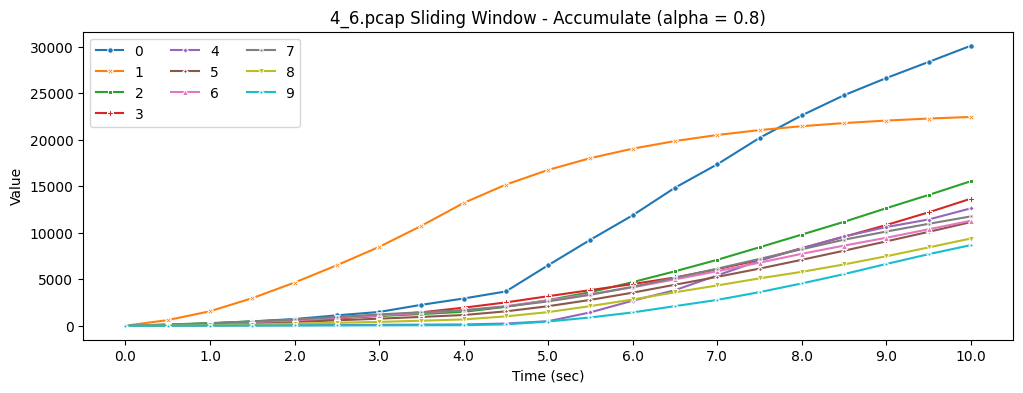

[[0, 445, 887, 1350, 1721, 2701, 2923, 4000, 15027, 17464, 19640, 23936, 24659, 28794, 29554, 30682, 31275, 32523, 34326, 35896, 38170], [0, 667, 863, 1219, 1294, 1631, 1873, 3586, 5080, 6427, 8421, 9925, 11437, 13231, 14668, 16077, 17894, 19158, 20883, 22456, 24044], [0, 205, 563, 1058, 1381, 1730, 2301, 3132, 4199, 4833, 5412, 6385, 7990, 9429, 11710, 12858, 14237, 15989, 17894, 19936, 20913], [0, 35, 68, 103, 126, 147, 175, 586, 1417, 5207, 7662, 8284, 11722, 13221, 13645, 14603, 14605, 14609, 17367, 17371, 17375], [0, 235, 500, 751, 998, 1254, 1478, 2643, 3830, 4984, 6140, 7273, 8104, 9153, 10329, 11447, 12541, 13644, 14798, 15888, 16819], [0, 3014, 5358, 8584, 11336, 13930, 16359, 16380, 16396, 16403, 16405, 16408, 16409, 16410, 16412, 16413, 16414, 16417, 16419, 16421, 16425], [0, 560, 793, 1146, 1631, 1997, 2335, 3490, 4699, 6009, 7460, 8816, 9952, 11271, 12288, 13275, 13542, 14187, 14859, 15629, 16327], [0, 400, 720, 1106, 1345, 1904, 2118, 3106, 4430, 5319, 6296, 7605, 8613, 9

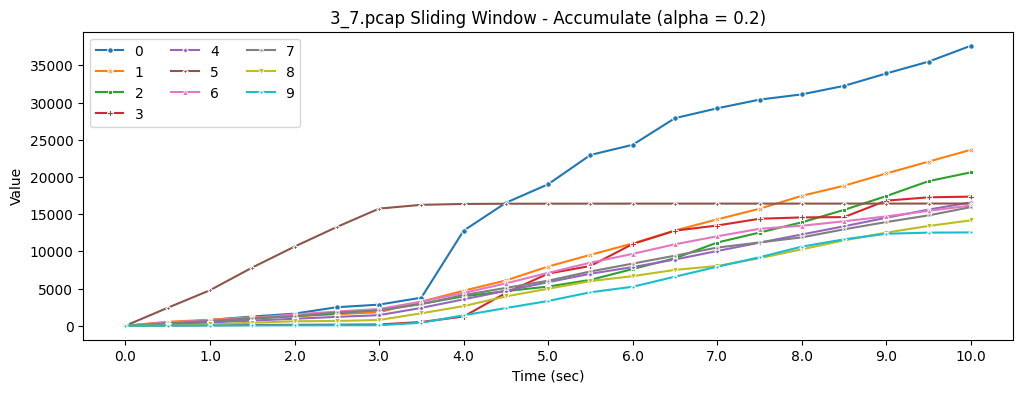

[[0, 445, 887, 1350, 1721, 2701, 2923, 4000, 15027, 17464, 19640, 23936, 24659, 28794, 29554, 30682, 31275, 32523, 34326, 35896, 38170], [0, 667, 863, 1219, 1294, 1631, 1873, 3586, 5080, 6427, 8421, 9925, 11437, 13231, 14668, 16077, 17894, 19158, 20883, 22456, 24044], [0, 205, 563, 1058, 1381, 1730, 2301, 3132, 4199, 4833, 5412, 6385, 7990, 9429, 11710, 12858, 14237, 15989, 17894, 19936, 20913], [0, 35, 68, 103, 126, 147, 175, 586, 1417, 5207, 7662, 8284, 11722, 13221, 13645, 14603, 14605, 14609, 17367, 17371, 17375], [0, 235, 500, 751, 998, 1254, 1478, 2643, 3830, 4984, 6140, 7273, 8104, 9153, 10329, 11447, 12541, 13644, 14798, 15888, 16819], [0, 3014, 5358, 8584, 11336, 13930, 16359, 16380, 16396, 16403, 16405, 16408, 16409, 16410, 16412, 16413, 16414, 16417, 16419, 16421, 16425], [0, 560, 793, 1146, 1631, 1997, 2335, 3490, 4699, 6009, 7460, 8816, 9952, 11271, 12288, 13275, 13542, 14187, 14859, 15629, 16327], [0, 400, 720, 1106, 1345, 1904, 2118, 3106, 4430, 5319, 6296, 7605, 8613, 9

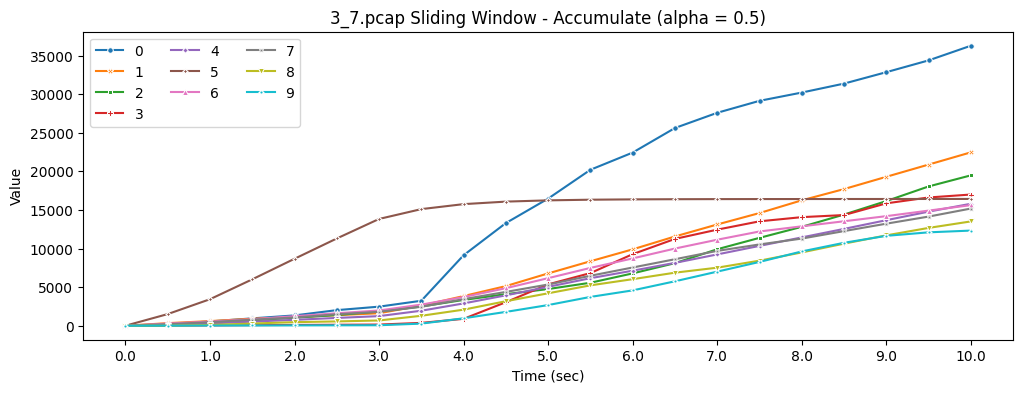

[[0, 445, 887, 1350, 1721, 2701, 2923, 4000, 15027, 17464, 19640, 23936, 24659, 28794, 29554, 30682, 31275, 32523, 34326, 35896, 38170], [0, 667, 863, 1219, 1294, 1631, 1873, 3586, 5080, 6427, 8421, 9925, 11437, 13231, 14668, 16077, 17894, 19158, 20883, 22456, 24044], [0, 205, 563, 1058, 1381, 1730, 2301, 3132, 4199, 4833, 5412, 6385, 7990, 9429, 11710, 12858, 14237, 15989, 17894, 19936, 20913], [0, 35, 68, 103, 126, 147, 175, 586, 1417, 5207, 7662, 8284, 11722, 13221, 13645, 14603, 14605, 14609, 17367, 17371, 17375], [0, 235, 500, 751, 998, 1254, 1478, 2643, 3830, 4984, 6140, 7273, 8104, 9153, 10329, 11447, 12541, 13644, 14798, 15888, 16819], [0, 3014, 5358, 8584, 11336, 13930, 16359, 16380, 16396, 16403, 16405, 16408, 16409, 16410, 16412, 16413, 16414, 16417, 16419, 16421, 16425], [0, 560, 793, 1146, 1631, 1997, 2335, 3490, 4699, 6009, 7460, 8816, 9952, 11271, 12288, 13275, 13542, 14187, 14859, 15629, 16327], [0, 400, 720, 1106, 1345, 1904, 2118, 3106, 4430, 5319, 6296, 7605, 8613, 9

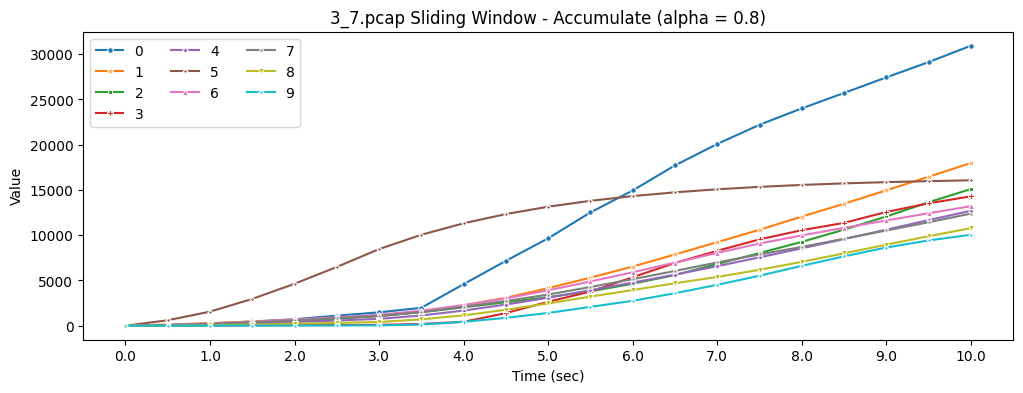

In [17]:
def plot_accumulate(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="accumulate.txt", window_size=100, weight=0.5):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)[algo][:10]
    print(res)
    
    res = calculate_window_value(res, weight)
    print(res)

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Sliding Window - Accumulate (alpha = %.1f)' % (dataset[:-1], weight))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
window_sizes = [100, 200, 500]
weights = [0.2, 0.5, 0.8]

# for d in datasets:
#     for ws in window_sizes:
#         plot_accumulate(dataset=d, window_size=ws)

for d in datasets:
    for w in weights:
        plot_accumulate(dataset=d, window_size=500, weight=w)

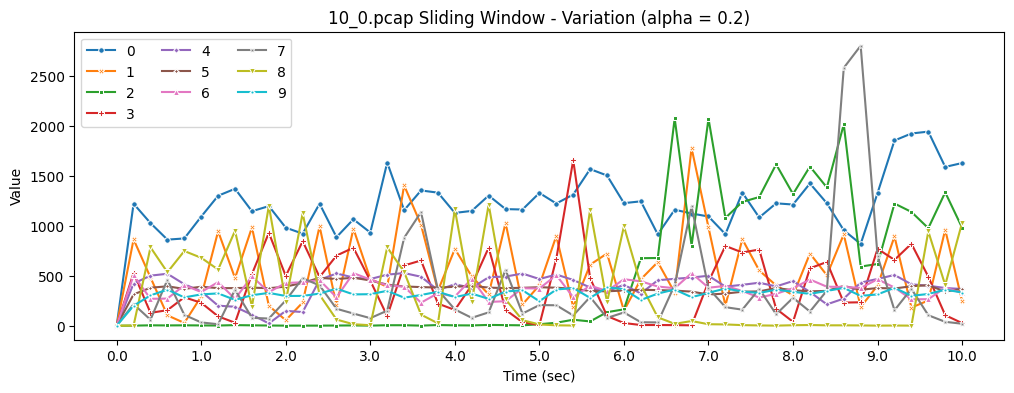

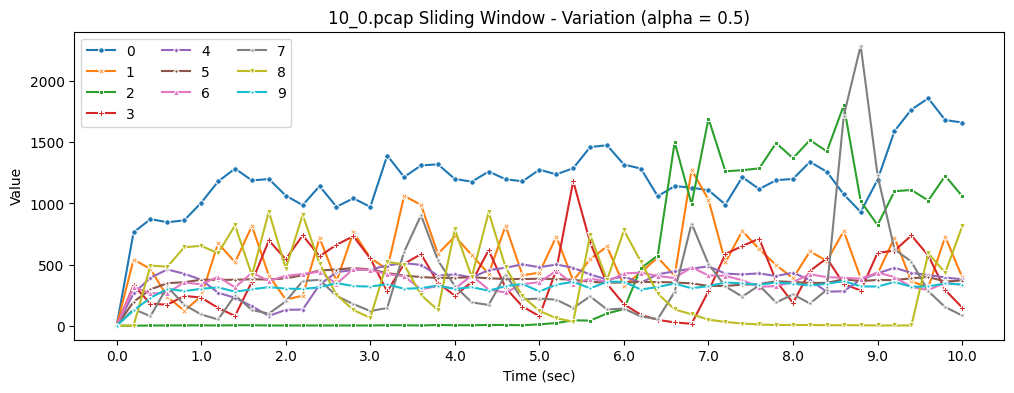

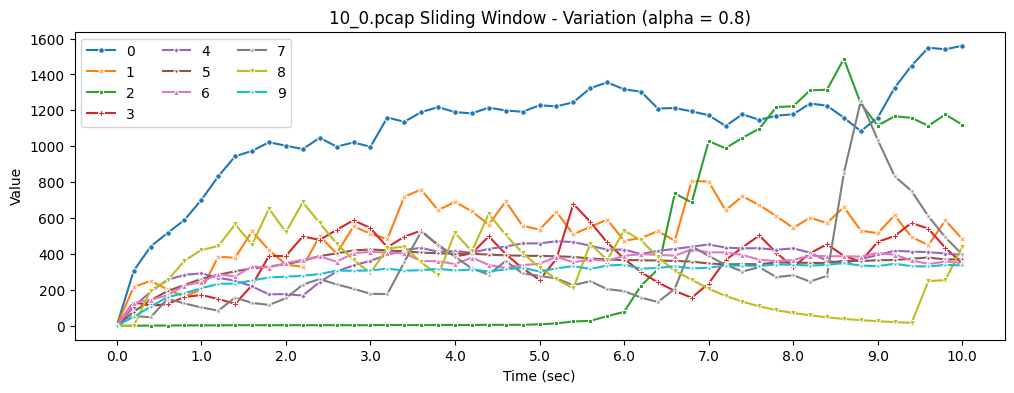

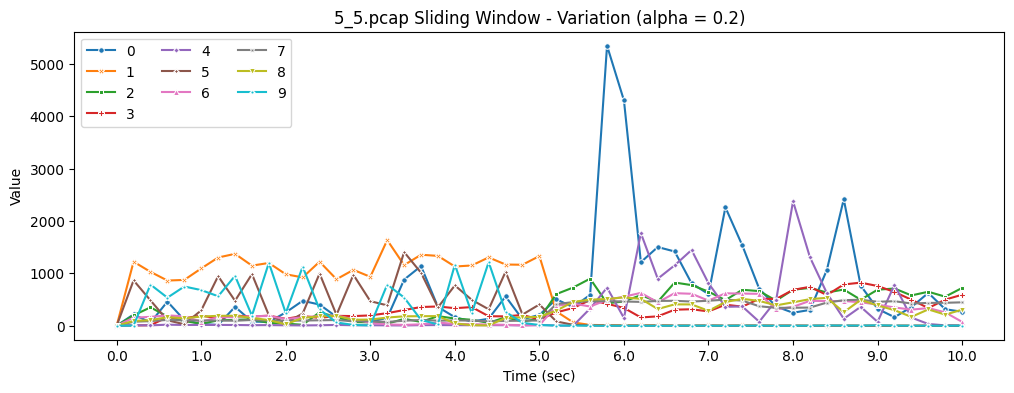

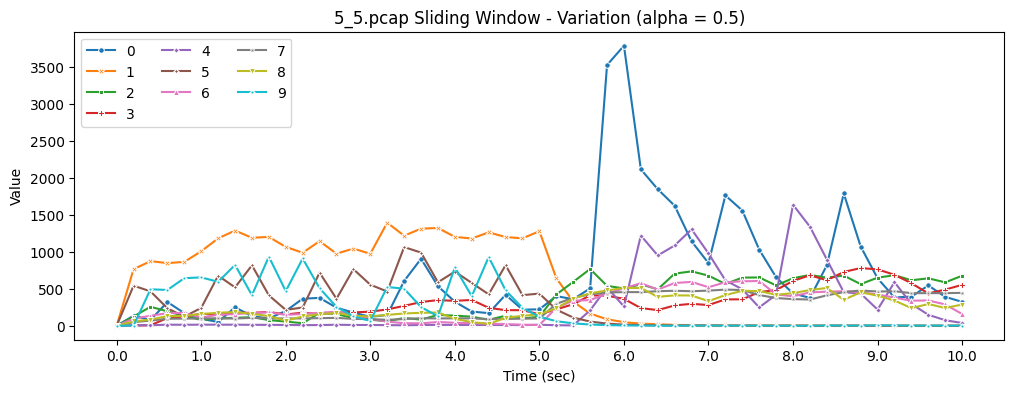

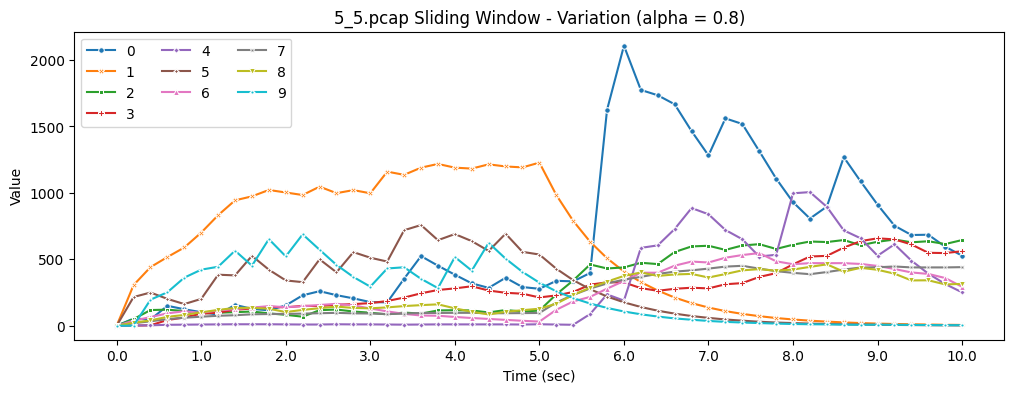

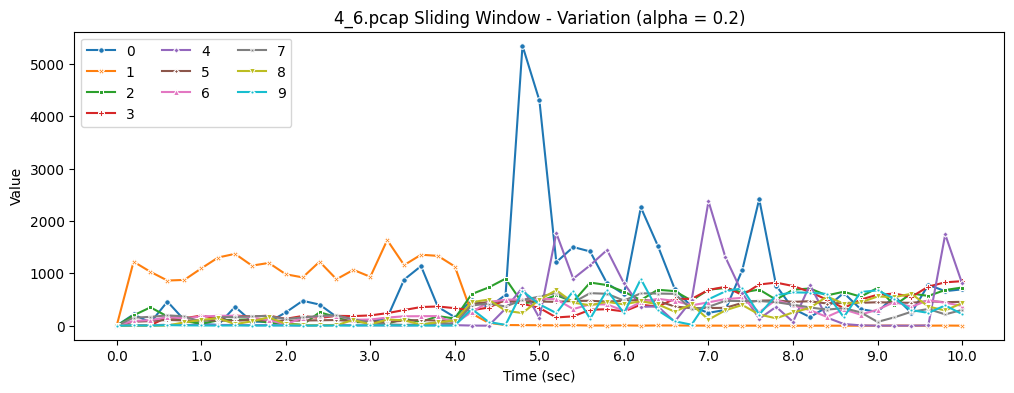

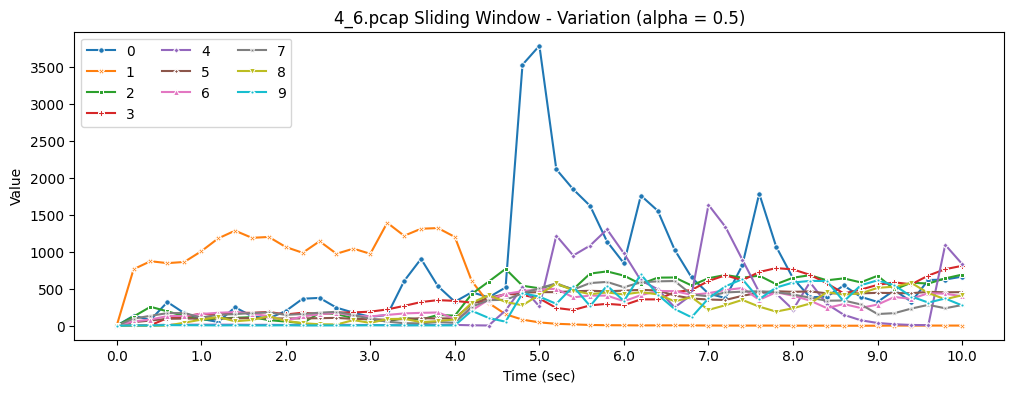

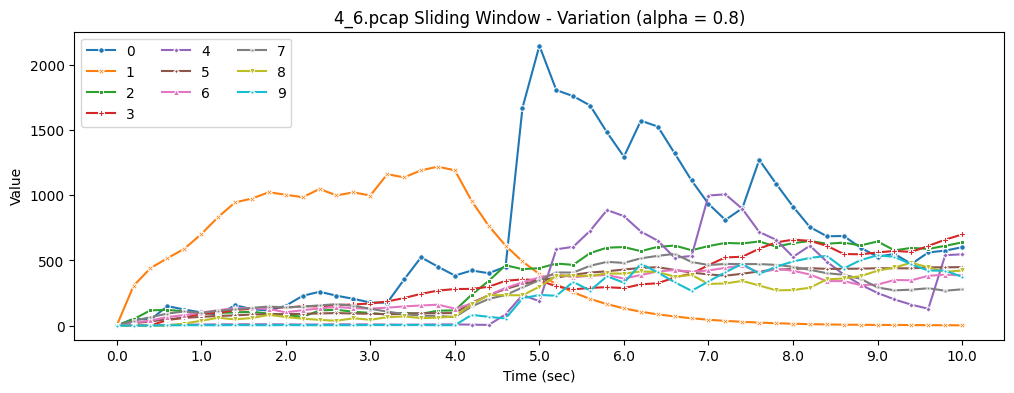

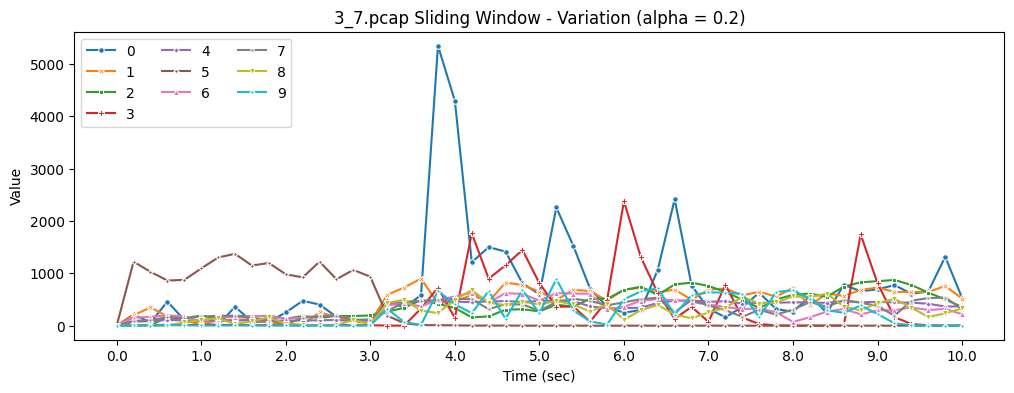

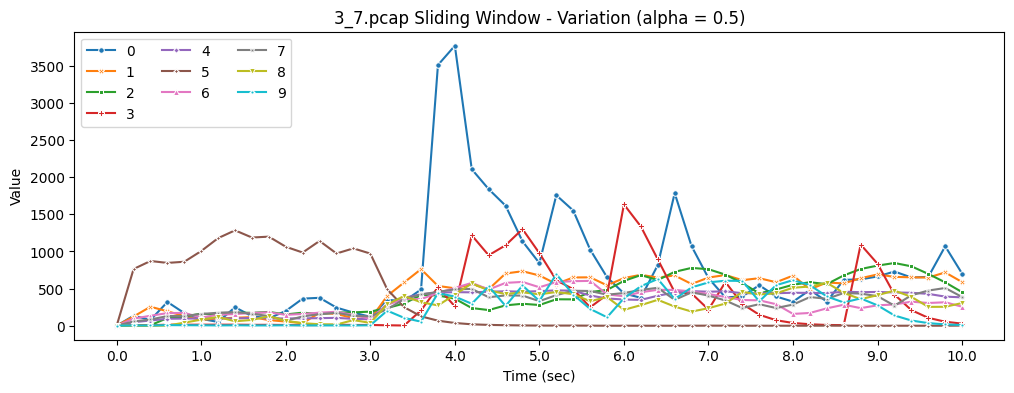

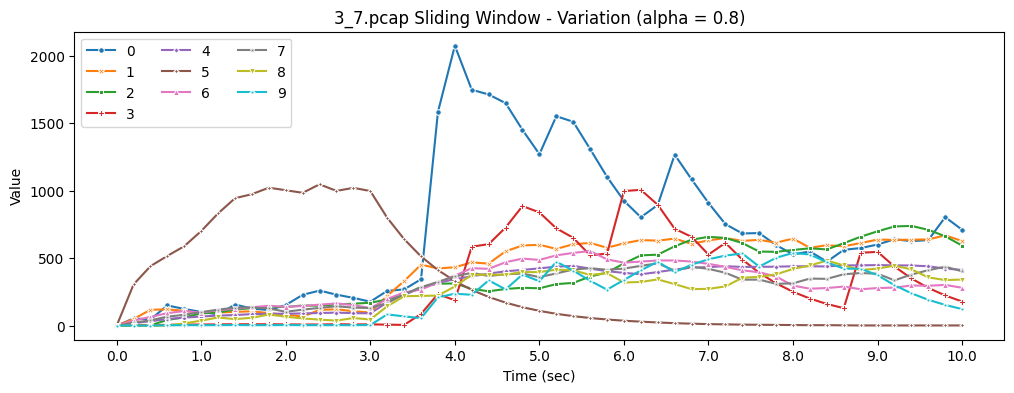

In [24]:
def plot_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="variation.txt", window_size=100, weight=0.5):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)[algo][:10]
    res = calculate_window_value(res, weight)

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Sliding Window - Variation (alpha = %.1f)' % (dataset[:-1], weight))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
window_sizes = [100, 200, 500]
weights = [0.2, 0.5, 0.8]

for d in datasets:
    for w in weights:
        plot_variation(dataset=d, window_size=200, weight=w)

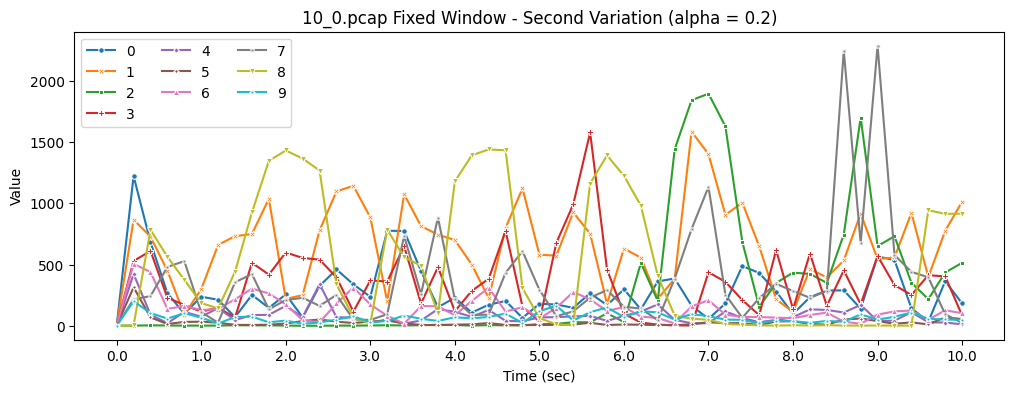

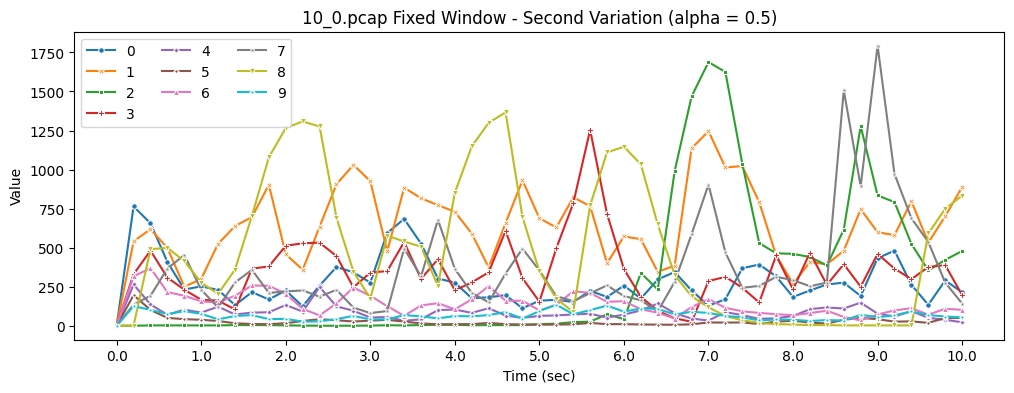

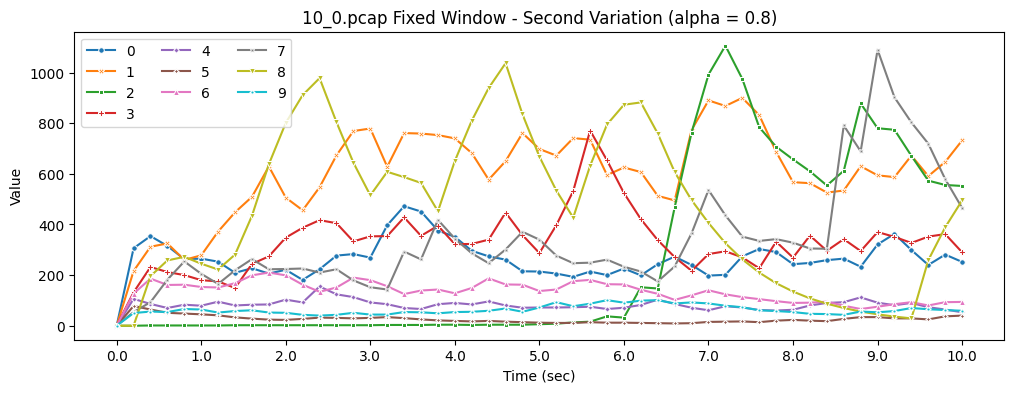

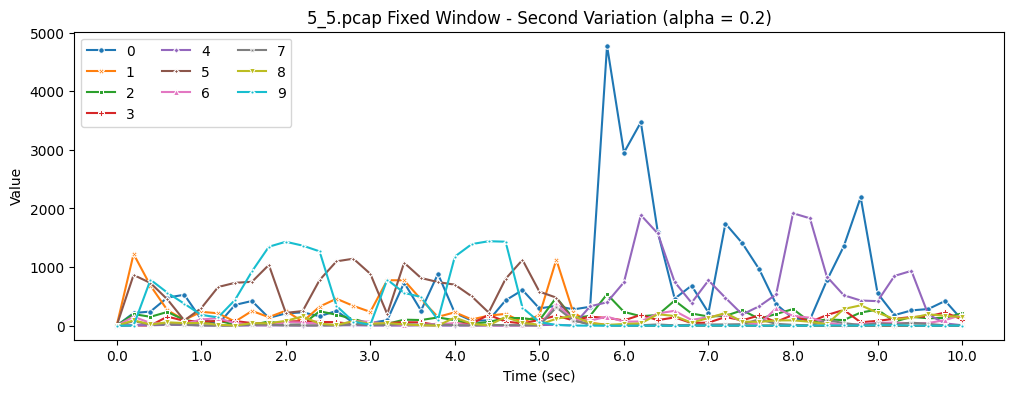

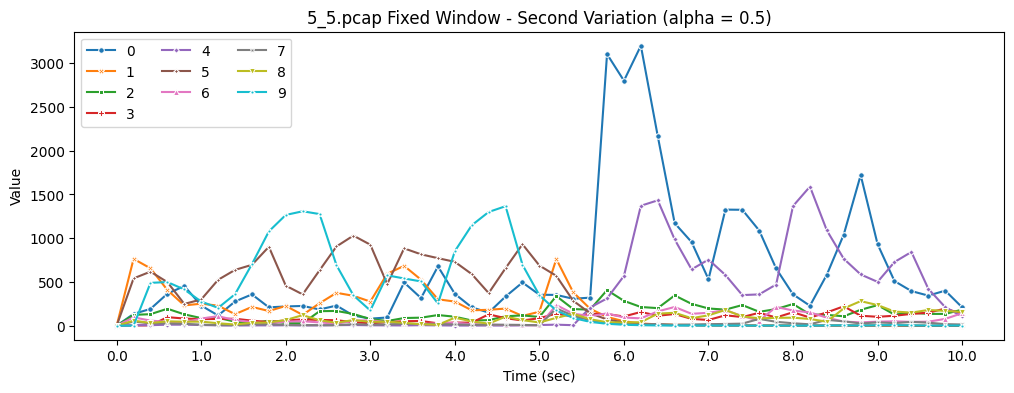

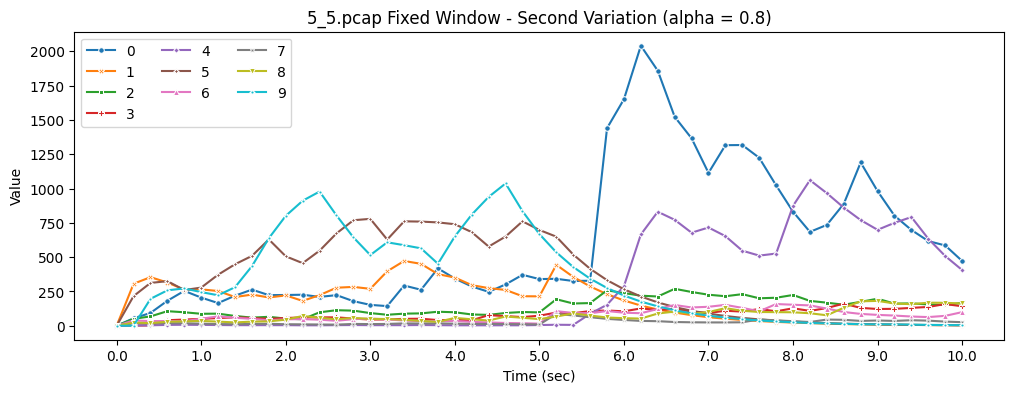

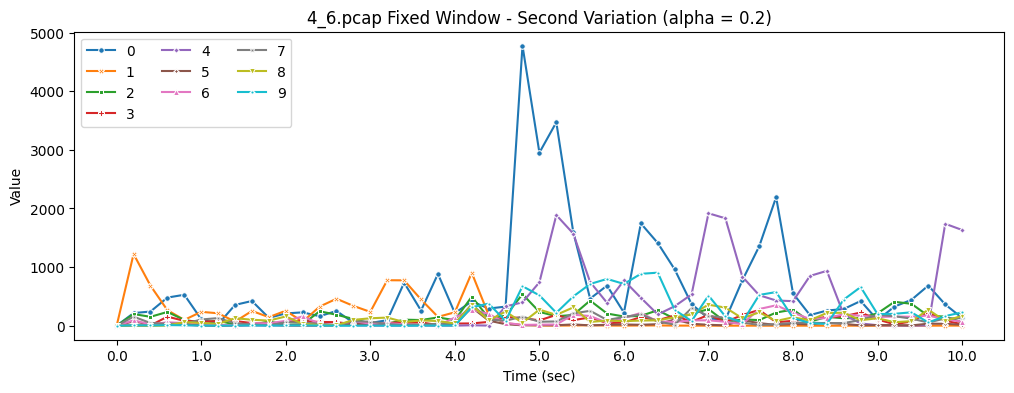

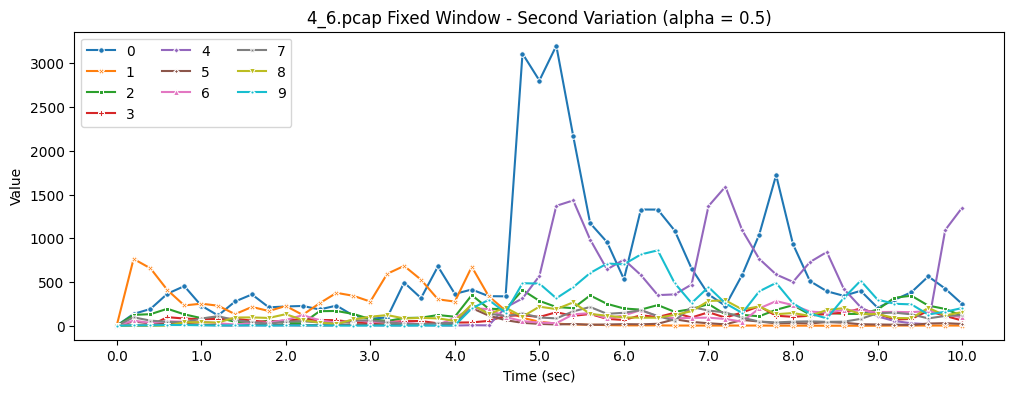

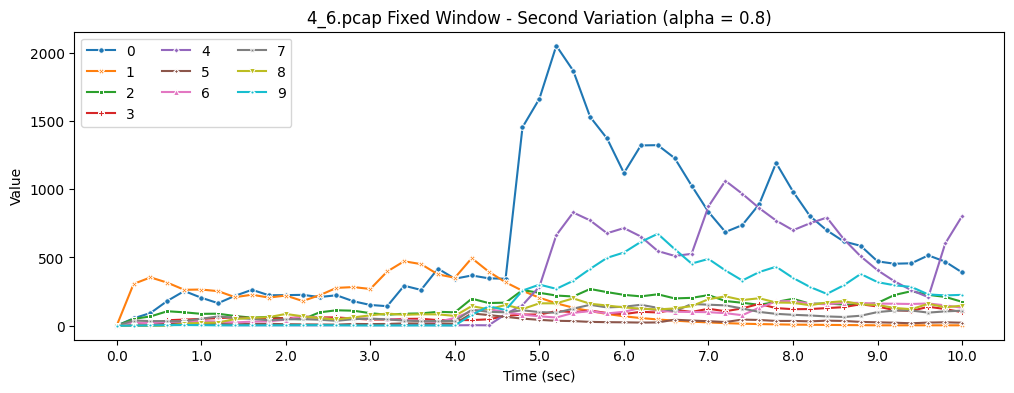

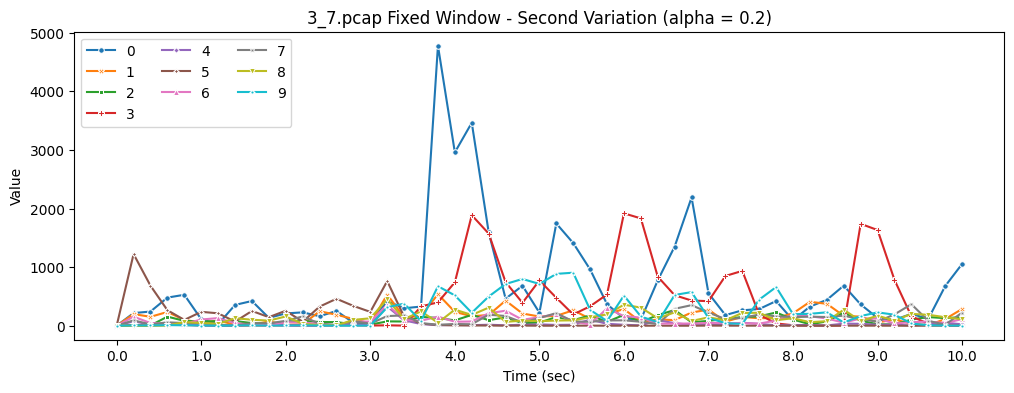

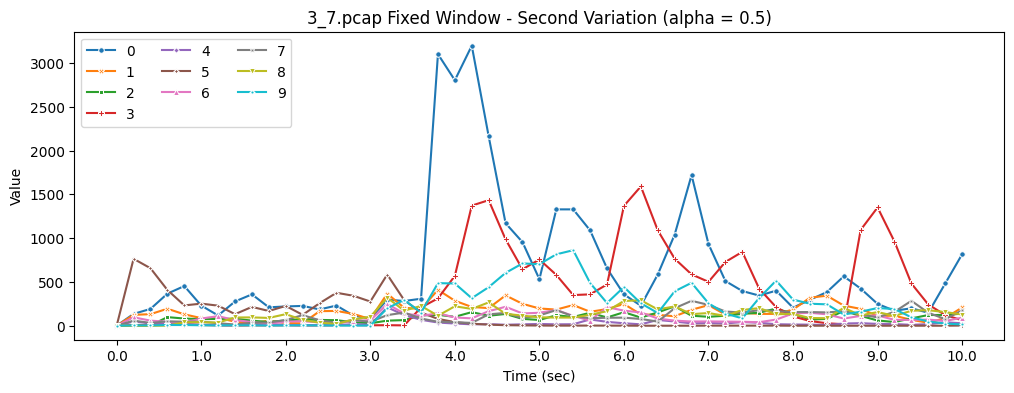

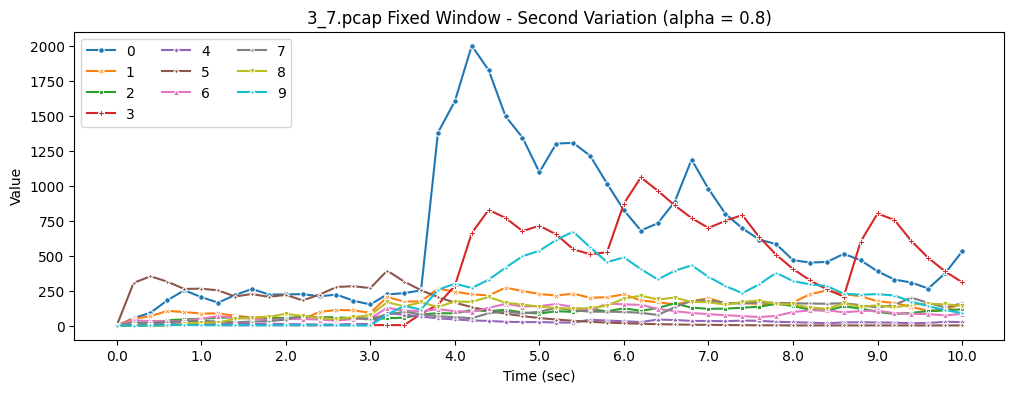

In [25]:
def plot_second_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='5_5.pcap/', type="second_variation.txt", window_size=100, weight=0.5):
    
    res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)[algo][:10]
    res = calculate_window_value(res, weight)
    # vote = [max(item) for item in res]
    # print(vote)

    plt.figure(figsize=(12, 4))
    
    sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
        # plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        

 # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window - Second Variation (alpha = %.1f)' % (dataset[:-1], weight))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
window_sizes = [100, 200, 500]
weights = [0.2, 0.5, 0.8]

for d in datasets:
    for w in weights:
        plot_second_variation(dataset=d, window_size=200, weight=w)